Inicio

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datamodule.connectionDataBase import ConnectionDataBase
import queries.queries as qrs

Conexão base de dados


In [21]:
conn = ConnectionDataBase()

Desconnected to base postgres


Carrega os dados

In [22]:
def Dados(query):
    results = None
    connection = conn.Connection()
    connection.autocommit = False

    cursor = connection.cursor()
    try:
        cursor.execute(query)
        results = cursor.fetchall()            
        connection.commit()
    except (Exception) as error:
        connection.rollback()
        print('error in query: ' + query, error)
        raise

    finally:
        if cursor is not None:
            if not cursor.closed:
                cursor.close()
    return results

In [23]:
def ShowBarplot(results):
    intervalos = [str(d[0]) + "%" for d in results]
    quantidades = [d[1] for d in results]

    sns.barplot(x=intervalos, y=quantidades)
    plt.xlabel("Acurácia")
    plt.ylabel("Qtd. Registros")
    plt.title("Contagem de registros por intervalo")

    for i in range(len(quantidades)):
        plt.text(i, quantidades[i], str(quantidades[i]), ha='center', va='bottom')

    plt.show()

In [24]:
def ShowPieplot(results):
    intervalos = [str(d[0]) + "%" for d in results]
    quantidades = [d[1] for d in results]

    colors = ['red', 'yellow', 'orange', 'cyan', 'blue', 'purple', 'pink', 'gray', 'brown', 'black', 'green']
    plt.figure(figsize=(10, 10))
    plt.pie(quantidades, colors=colors, autopct='%1.1f%%', startangle=90)

    legend = plt.legend(intervalos, title='Acurácia', loc='best')
    legend.set_title('Acurácia', prop={'size': 12})

    plt.axis('equal')
    plt.title('Distribuição da acurácia em relação ao total de registros')
    plt.show()

In [25]:
def ShowScatterplot(results):
    df = pd.DataFrame(results, columns=["acerto", "quantidade"])
    sns.scatterplot(data=df, x='acerto', y='quantidade')
    plt.title('Gráfico de dispersão com regressão linear')
    plt.show()

In [26]:
def ShowHistplot(results):
    pass

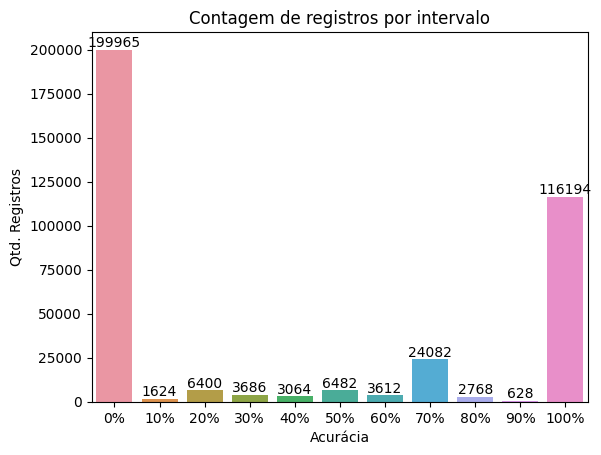

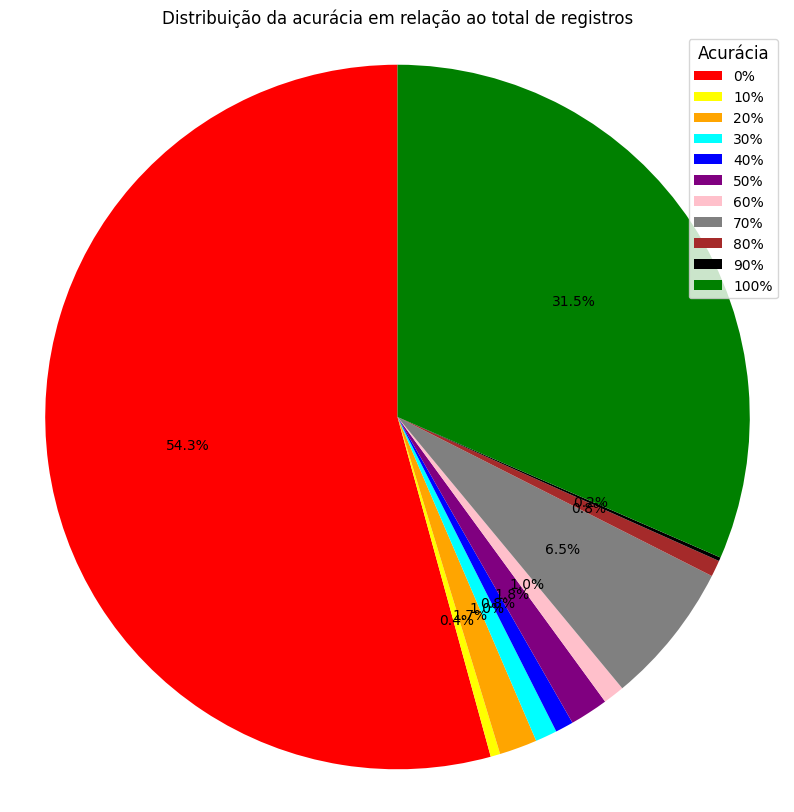

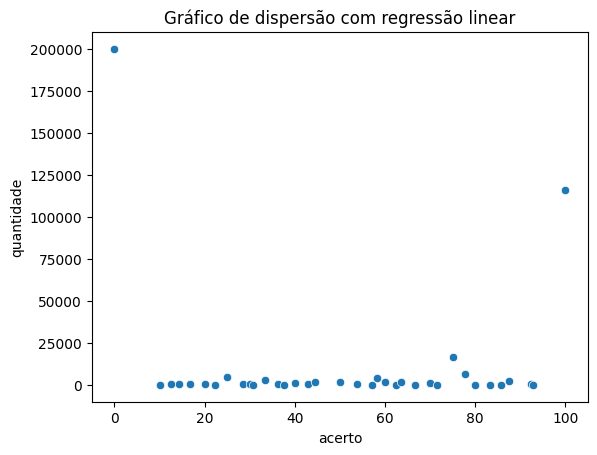

In [28]:
results = Dados(qrs.SELECT_CASE_COUNT_ESTATISTICA)
ShowBarplot(results)
ShowPieplot(results)

results = Dados(qrs.SELECT_ACERTO_QTD_EST)
ShowScatterplot(results)

ShowHistplot(results)